pi can be approximated by throwing darts at a circle in a square, and calculating the ratio of darts landing on the circle vs the square.

In [200]:
import math
import random

## simple way

First, we generate a bunch of throws by using random.random()

We are throwing darts in only the top right quadrant of the square, so the origin is the center of the square, and the diameter of the circle is 2.

We figure out if the points are in the circle by using the pythogeras theorem to calculate the distance of each point from the origin `(0,0)`. If the distance is greater than the radius of the circle, it's outside.

In [209]:
darths_thrown = 10000
throws = [[random.random(), random.random()] for i in range(darths_thrown)]

in_circle=0
out_circle=0

for throw in throws:
    if math.sqrt(throw[0]**2 + throw[1]**2) <= 1:
        in_circle +=1
    else:
        out_circle += 1

pi_estimate = in_circle/len(throws) * 4

print(f'estimate: {pi_estimate}')
print(f'actual: {math.pi}')
print(f'difference is {abs(pi_estimate-math.pi)}')

estimate: 3.146
actual: 3.141592653589793
difference is 0.004407346410206792


# now to jazz this up visually

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(np.random.rand(darths_thrown,2)*2, columns=["x", "y"])
df.head()

,x,y
0,0.946924,0.950627
1,1.053205,0.041109
2,1.365198,1.888242
3,1.806928,0.279787
4,0.162452,0.148584


In [211]:
def is_in_circle(row):
    x = row['x']
    y = row['y']
    if math.sqrt((x-1)**2 + (y-1)**2) <= 1:
        return True
    else:
        return False

df['In_Circle'] = df.apply(is_in_circle, axis=1)
df.head()

,x,y,In_Circle
0,0.946924,0.950627,True
1,1.053205,0.041109,True
2,1.365198,1.888242,True
3,1.806928,0.279787,False
4,0.162452,0.148584,False


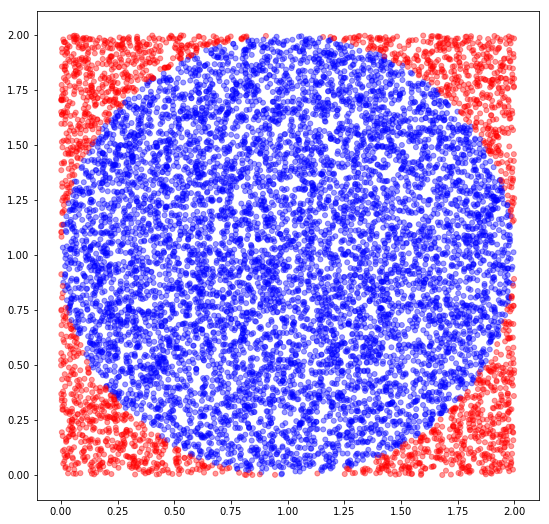

In [242]:
plt.scatter(df['x'], df['y'], c=[within and 'blue' or 'red' for within in df['In_Circle']], alpha=0.4,s= 25)

fig = plt.gcf()
fig.set_size_inches(9,9);

the ratio of the area of the circle divided by the area of the square gives us pi/4:

In [205]:
pi_estimate = df['In_Circle'].sum() / len(df) * 4
pi_estimate

3.1453333333333333

In [206]:
pi_estimate - math.pi

0.0037406797435401984

So the estimate is pretty close! Neat, since all it took was some very simple maths and a random number generator.